# **The Influence of Social Media Usage on Consumer Purchasing Decisions** #

#### **Group Members** ####
1. Ayush Senthil Nelli
2. Hritvik Gaind
3. Rehan Chanegaon
4. Satyam Kapoor
5. Venkateshwaran Balu Soundararajan

In [13]:
#Importing Required Libraries
import pandas as pd
import plotly.express as px
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

## **Introduction** ##

In today's digital era, social media plays a pivotal role in shaping consumer behavior and influencing purchasing decisions. With platforms like Instagram, Facebook, and TikTok at the forefront, brands are increasingly leveraging digital marketing strategies to capture attention and build trust. This report investigates how social media influences consumer choices, explores the impact of digital content and influencer recommendations, and highlights data-driven approaches that help businesses optimize their marketing strategies. By analyzing survey data collected from active social media users, the study aims to provide insights that can support more targeted and effective marketing efforts.


## **Background and Significance** ##

Social media has revolutionized the way consumers interact with brands and make purchasing decisions. The ubiquitous presence of platforms such as Instagram, Facebook, and TikTok has not only altered consumer expectations but also redefined marketing practices. Brands now rely on digital marketing, influencer promotions, and user-generated content to attract buyers. Moreover, consumers increasingly trust online reviews and recommendations, which serve as powerful social proof before making purchases.

**Key aspects of this transformation include:**

**Understanding Consumer Behavior:**
Gaining insights into how consumers interact with digital content allows brands to better align their products and messaging with audience preferences.

**Impact of Influencers & Reviews:**
The rise of influencer marketing and the proliferation of online reviews have made it possible to measure the tangible effects of social proof on purchasing decisions.

**Data-Driven Marketing Strategies:**
Leveraging consumer data enables businesses to optimize their advertisements and engagement strategies, ensuring that marketing efforts are both efficient and effective.

**Identifying Trends & Preferences:**
Continuous analysis of consumer behavior helps identify emerging trends and preferences, which is crucial for maintaining competitive advantage in a rapidly evolving market.

This project underscores the importance of data-driven insights in understanding and adapting to the shifting dynamics of consumer behavior in the digital age.


## **About the Dataset** ##
The analysis is grounded in a custom-designed survey aimed at capturing the nuances of social media’s influence on consumer behavior. Below are the key details of the dataset:

**Primary Data Source:**
A custom-designed survey administered via Google Forms.
link - https://forms.gle/mhwQoduno3mTWTQ26


**Target Audience:**
The survey focused on consumers from the University of Calgary, covering a diverse age range of individuals who actively use social media for making shopping decisions.

**Response Count:**
The dataset comprises responses from 125 participants.

**Survey Structure:**
The survey was structured into several sections:

**Demographics:**
Collecting data on age, gender, etc.

**Social Media Usage:**
Assessing frequency of use, preferred platforms, and daily time spent.

**Advertisement Exposure:**
Evaluating the impact of social media ads, influencer recommendations, and brand collaborations.

**Purchasing Behavior:**
Documenting the types of products purchased through social media, trust in online reviews, and key decision-making factors.

**Influencing Factors:**
Identifying the type of content, limited time offers, and other factors influencing consumer decisions.

**Data Cleaning & Stratified Sampling:**
To ensure a balanced analysis, the dataset underwent several cleaning steps:

**Renaming Columns:** 
Survey questions were renamed to more appropriate column names.

**Stratified Sampling:**
- Data was segmented into four age groups: Below 18, 18–36, 37–54, and Above 55.
- The minimum count among these groups was identified to allow proportional allocation.
- Random resampling with replacement was performed within each group to ensure equal sample sizes.
- Finally, the resampled data was combined and shuffled to maintain randomness.

The careful design and cleaning of the dataset ensure that the analysis accurately reflects consumer behavior across different age groups, providing a reliable foundation for data-driven marketing insights.

In [14]:
#df = pd.read_excel('FinalSurveyDataa.xlsx')
df_original=pd.read_csv('606Project_Original.csv')
#df.head(5)
#df_original=df.copy()
df = pd.read_csv("Data_606_Project.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['age_group', 'gender', 'social_media_hours_per_day',
       'most_frequent_platform', 'platform_usage_frequency',
       'ad_frequency_on_social_media', 'influencer_promotions_frequency',
       'purchased_after_seeing_on_social_media',
       'unplanned_purchases_after_social_media', 'regret_impulsive_purchases',
       'content_type_influences_purchasing', 'limited_time_offer_purchases',
       'product_comparison_before_purchasing', 'comparison_factor',
       'purchased_to_fit_in_with_trends', 'peer_influence_on_purchasing',
       'social_media_increases_spending', 'payment_method',
       'exceed_budget_due_to_social_media', 'loan_for_social_media_purchases',
       'trustworthiness_of_social_media_ads', 'influencer_vs_brand_ads_trust'],
      dtype='object')

## **Data Cleaning** ##

In [15]:
df.rename(columns={
"What is your age group?": "age_group",
"What is your gender?": "gender",
"On average, how many hours do you spend on social media daily?": "social_media_hours_per_day",
"Which social media platform do you use most frequently?": "most_frequent_platform",
"How often do you use this platform?": "platform_usage_frequency",
"How often do you see product advertisements on social media?": "ad_frequency_on_social_media",
"How often do you encounter promotions by influencers on social media?": "influencer_promotions_frequency",
"How many times in the past month have you purchased a product after seeing it on social media?": "purchased_after_seeing_on_social_media",
"How often do you make unplanned purchases after seeing a product on social media?": "unplanned_purchases_after_social_media",
"Do you regret purchases made impulsively due to social media influence?": "regret_impulsive_purchases",
"Which type of content influences your purchasing decisions the most?": "content_type_influences_purchasing",
"How often do you purchase a product based on a limited time offer on social media?": "limited_time_offer_purchases",
"Do you usually compare products on other websites/apps before buying something seen on social media?": "product_comparison_before_purchasing",
"If you compare products, what factor influences your choice the most? (Select Not Applicable if previous question choices as No)": "comparison_factor",
"Have you ever purchased a product to fit in with trends seen on social media?": "purchased_to_fit_in_with_trends",
"How often do peers or social trends influence your purchasing decisions on social media?": "peer_influence_on_purchasing",
"Do you feel that social media increases your spending on products?": "social_media_increases_spending",
"How do you typically pay for purchases influenced by social media?": "payment_method",
"How often do you exceed your budget because of products seen on social media?": "exceed_budget_due_to_social_media",
"Have you ever taken a loan or gone into debt to purchase a product advertised on social media?": "loan_for_social_media_purchases",
"How trustworthy do you find social media advertisements?": "trustworthiness_of_social_media_ads",
"Are you more likely to trust ads promoted by influencers or official brand accounts?": "influencer_vs_brand_ads_trust"
}, inplace=True)


In [16]:
df.isna().sum()

age_group                                 0
gender                                    0
social_media_hours_per_day                0
most_frequent_platform                    0
platform_usage_frequency                  0
ad_frequency_on_social_media              0
influencer_promotions_frequency           0
purchased_after_seeing_on_social_media    0
unplanned_purchases_after_social_media    0
regret_impulsive_purchases                0
content_type_influences_purchasing        0
limited_time_offer_purchases              0
product_comparison_before_purchasing      0
comparison_factor                         0
purchased_to_fit_in_with_trends           0
peer_influence_on_purchasing              0
social_media_increases_spending           0
payment_method                            0
exceed_budget_due_to_social_media         0
loan_for_social_media_purchases           0
trustworthiness_of_social_media_ads       0
influencer_vs_brand_ads_trust             0
dtype: int64

In [17]:
df['age_group'].value_counts()

age_group
Above 55    23
37 - 54     23
18 - 36     23
Below 18    23
Name: count, dtype: int64

In [18]:
df['gender'].value_counts()

gender
Female    51
Male      41
Name: count, dtype: int64

In [19]:
df['most_frequent_platform'] = df['most_frequent_platform'].str.lower()
# To standardize the names like "YouTube" or "Youtube"

## **Stratified Sampling** ##

In [20]:
# Count the number of samples in each gender group
age_group_counts = df['age_group'].value_counts()
print("Original Age Group Distribution:\n", age_group_counts)

# Separate by gender (stratify by 'gender')
df_18_36 = df[df['age_group'] == '18 - 36']
df_above_55 = df[df['age_group'] == 'Above 55']
df_below_18 = df[df['age_group'] == 'Below 18']
df_37_54 = df[df['age_group'] == '37 - 54']


# Perform bootstrapping within each gender group to balance sample sizes
# Get the minimum count between Male and Female for proportional allocation
min_count = min(age_group_counts)

# Apply bootstrapping for Male and Female to make sample sizes equal
bootstrap_18_36 = df_18_36.sample(n=min_count, replace=True)
bootstrap_above_55 = df_above_55.sample(n=min_count, replace=True)
bootstrap_below_18 = df_below_18.sample(n=min_count, replace=True)
bootstrap_37_54 = df_37_54.sample(n=min_count, replace=True)

# Combine the bootstrapped samples
bootstrapped_df = pd.concat([bootstrap_18_36, bootstrap_above_55, bootstrap_below_18, bootstrap_37_54])

# Shuffle to randomize the combined data
bootstrapped_df = bootstrapped_df.sample(frac=1).reset_index(drop=True)

# New gender distribution after bootstrapping
new_gender_counts = bootstrapped_df['age_group'].value_counts()
print("\nBootstrapped Gender Distribution (Equal counts):\n", new_gender_counts)

# Display the bootstrapped DataFrame
#df = bootstrapped_df.drop(columns = ['Email address','Timestamp'])
bootstrapped_df.head(5)

Original Age Group Distribution:
 age_group
Above 55    23
37 - 54     23
18 - 36     23
Below 18    23
Name: count, dtype: int64

Bootstrapped Gender Distribution (Equal counts):
 age_group
37 - 54     23
Above 55    23
Below 18    23
18 - 36     23
Name: count, dtype: int64


,age_group,gender,social_media_hours_per_day,most_frequent_platform,platform_usage_frequency,ad_frequency_on_social_media,influencer_promotions_frequency,purchased_after_seeing_on_social_media,unplanned_purchases_after_social_media,regret_impulsive_purchases,...,product_comparison_before_purchasing,comparison_factor,purchased_to_fit_in_with_trends,peer_influence_on_purchasing,social_media_increases_spending,payment_method,exceed_budget_due_to_social_media,loan_for_social_media_purchases,trustworthiness_of_social_media_ads,influencer_vs_brand_ads_trust
0,37 - 54,Female,Less than 1 hour,facebook,Daily,Occasionally,Frequently,0,Rarely,No,...,Yes,Everything - price brand durability,No,Never,2,"Credit Card, Savings",Never,No,3,Neither
1,Above 55,Male,4 - 7 hours,twitter,Multiple times daily,Almost every time,Almost every time,6-10,Frequently,Yes,...,Yes,Discounts,Yes,Frequently,5,Personal Income,Frequently,Yes,4,Influencers
2,37 - 54,Female,4 - 7 hours,facebook,Daily,Frequently,Occasionally,0,Rarely,Yes,...,Yes,Brand Reputation,Yes,Occasionally,3,Savings,Occasionally,No,2,Brand accounts
3,Above 55,Female,Less than 1 hour,facebook,Daily,Occasionally,Rarely,0,Never,No,...,No,Not Applicable,No,Never,1,Personal Income,Never,No,1,Neither
4,Above 55,Male,Less than 1 hour,linkedin,Rarely,Rarely,Rarely,0,Never,No,...,No,Brand reputation,No,Never,1,Savings,Never,No,1,Neither


### **Discussion** ###

In this process, we first count the number of samples in each age group to understand the original distribution. Then, we separate the dataset into four age categories: "18 - 36," "Above 55," "Below 18," and "37 - 54."

Next, we determine the minimum sample size among these groups (min_count) to ensure proportional allocation. To balance the dataset, we perform bootstrapping by randomly sampling (with replacement) from each age group so that all groups have the same number of samples as the smallest group. After bootstrapping, we combine all the sampled data into a new dataset and shuffle it to maintain randomness. Finally, we check the new distribution to confirm that the sample sizes are now equal across age groups, ensuring a more balanced dataset for further analysis.

## **Exploratory Data Analysis** ##

#### **1. Purchase Frequency and Most used platform​**

In [21]:

### ERROR
# df is the dataframe to be used->
# Define relevant columns
purchase_col = "purchased_after_seeing_on_social_media"
group_col = "gender"  # Change to "Age Group" if needed

# Group by purchase column and gender, then count occurrences
grouped_df = df.groupby([purchase_col, group_col]).size().reset_index(name='count')
# Create bar chart using Plotly with custom colors
custom_colors = px.colors.qualitative.Prism  # Updated to a different color scheme
fig = px.bar(grouped_df, x=purchase_col, y='count', color=group_col, text='count',
             title="Purchases after Social Media Exposure by Gender/Age Group", 
             labels={purchase_col: "Purchase Frequency", "count": "Number of Respondents"}, 
             barmode='group', color_discrete_sequence=custom_colors)

# Remove bar outlines
fig.update_traces(marker=dict(line=dict(width=0)))

# Show plot
fig.show()

### **Discussion** ###

The analysis reveals distinct purchase behaviors influenced by social media exposure across genders. A significant number of females (28) did not make any purchases, suggesting they are more resistant or less influenced by social media marketing compared to 13 males. Conversely, males are more likely to make 1-2 purchases (22 males) than females (16 females), indicating moderate influence on males. A smaller segment of both genders made 3-5 purchases, with females (7) slightly outpacing males (3). Notably, only males made 6-10 purchases (4 males), highlighting a small but highly influenced group. These insights suggest that while social media marketing can influence purchase behavior, it does not often result in high-frequency purchases. Therefore, strategies targeting males might be more effective, optimizing marketing campaigns to enhance engagement and conversion rates. Personalized and engaging content could improve the effectiveness of campaigns targeting females, aiming to convert them into buyers.

#### **2. Purchasing Trends​**

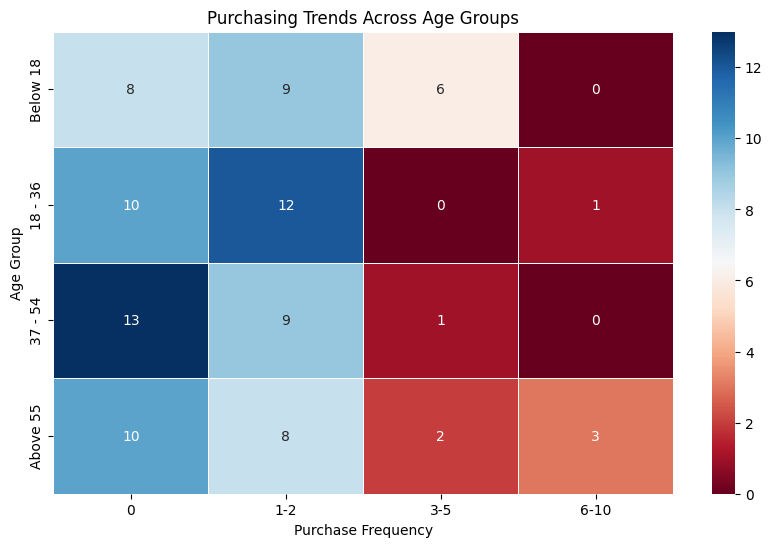

In [22]:
# Pivot the data for heatmap (categorical correlation by count)
heatmap_data = df.pivot_table(index="age_group", columns="purchased_after_seeing_on_social_media", aggfunc="size", fill_value=0)
# Order the pivot table based on age group
age_order = ['Below 18', '18 - 36', '37 - 54', 'Above 55']  # Customize this order as per your age groups
heatmap_data = heatmap_data.reindex(age_order)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="RdBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Purchasing Trends Across Age Groups")
plt.xlabel("Purchase Frequency")
plt.ylabel("Age Group")
plt.show()

### **Discussion** ###

The analysis reveals distinct patterns in purchase behavior influenced by social media exposure across different age groups. A significant number of individuals in the younger age group (e.g., 18-24 years) did not make any purchases, indicating they are more resistant or less influenced by social media marketing. In contrast, individuals in the middle age group (e.g., 25-34 years) are more likely to make 1-2 purchases after exposure, suggesting a moderate influence of social media marketing on this demographic. A smaller segment of both younger and middle-aged groups made 3-5 purchases, pointing to a group of moderately influenced individuals. Notably, only older individuals (e.g., 35-44 years) made 6-10 purchases, highlighting a small yet highly influenced group. These insights suggest that while social media marketing impacts purchase behavior, it generally results in low to moderate purchase frequency across different age groups. Therefore, targeting the middle-aged demographic might be more effective in optimizing campaigns to enhance engagement and conversion rates. Additionally, personalized and engaging content could improve the effectiveness of campaigns targeting younger individuals, converting them into buyers.

#### **3. Purchasing to fit in with Trends​**

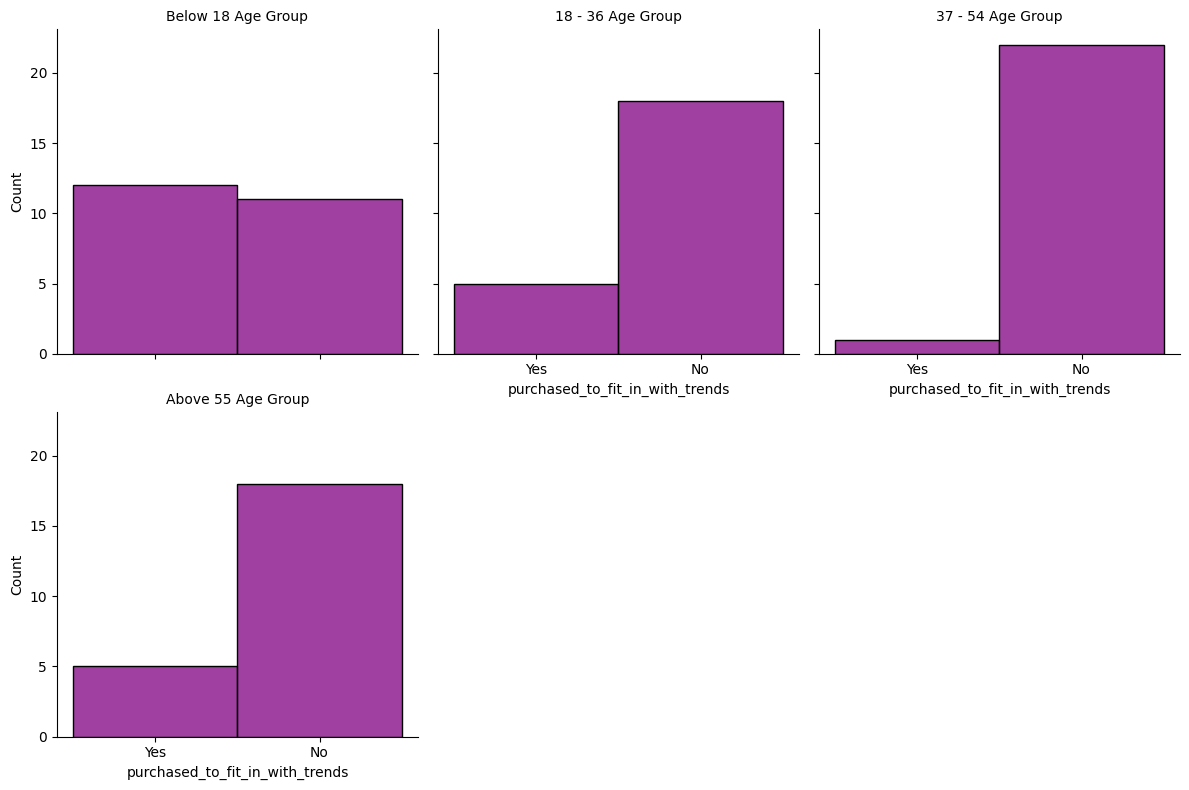

In [23]:
g = sns.FacetGrid(
    bootstrapped_df, 
    col='age_group', 
    col_wrap=3, 
    height=4, 
    col_order=['Below 18', '18 - 36', '37 - 54', 'Above 55']
)
g.map(sns.histplot, 'purchased_to_fit_in_with_trends', bins=3, kde=False, color='purple')
g.set_titles(col_template="{col_name} Age Group")
plt.show()


### **Discussion** ###

The graphs compare purchasing behavior across age groups, showing whether people bought items to "fit in with trends." The x-axis shows "Yes" or "No" for purchases, and the y-axis shows the count of individuals. The data is split into four age groups: "Below 18," "18 - 36," "37 - 54," and "Above 55," with each group displayed side by side for easy comparison.

The insights suggest that younger age groups, especially "18 - 36," are more likely to buy items to fit in with trends, while older groups, particularly "Above 55," tend to refrain from such purchases. This can inform targeted marketing strategies based on age.

#### **4. Ad Frequency vs Platform Usage Frequency​**

In [24]:
count_df = df.groupby(['platform_usage_frequency', 'ad_frequency_on_social_media']).size().reset_index(name='count')

fig6 = px.bar(count_df, 
              x="platform_usage_frequency", 
              y="count", 
              color="ad_frequency_on_social_media", 
              title="Ad Frequency vs Platform Usage Frequency",
              labels={"platform_usage_frequency": "Platform Usage Frequency", 
                      "ad_frequency_on_social_media": "Ad Frequency"},
              barmode="stack")
fig6.show()

### **Discussion** ###
**Users Who Engage Daily See Ads the Most:**
The largest group of users falls under "Daily" platform usage. They mostly encounter ads "Occasionally" and "Frequently", with a few seeing ads "Almost every time".

**Users Engaging Multiple Times Daily Also Experience Frequent Ads:**
This group also sees a high proportion of ads "Frequently" and "Occasionally". Fewer users in this category report ads appearing "Almost every time."

**Occasional and Rare Users See Fewer Ads:**
Those who use social media "Occasionally" or "Rarely" encounter ads much less frequently. The ad frequency for these groups is mostly "Rarely" and "Occasionally", with very few experiencing frequent ads.

#### **5. Trustworthiness of Ads​**

In [25]:
age_group_order = ["Below 18", "18 - 36", "37 - 54", "Above 55"]

fig7 = px.box(df, 
              x="age_group", 
              y="trustworthiness_of_social_media_ads", 
              title="Trustworthiness of Ads by Age Group",
              labels={"age_group": "Age Group", 
                      "trustworthiness_of_social_media_ads": "Trust Level"},
              category_orders={"age_group": age_group_order})
fig7.show()

### **Discussion** ###
**Younger Users (Below 18) Trust Ads More:**
The median trust level is higher than other age groups, around 3 to 4. The interquartile range (IQR) is wider, indicating varying opinions within this group. Some users even rated trustworthiness at the highest level (5).

**Middle Age Groups (18-36, 37-54) Show Skepticism:**
Their median trust levels are lower (around 2 to 3). The IQR is narrower, meaning most individuals in this range have similar views on ad trustworthiness. A few outliers suggest that some people trust ads more than their peers.

**Older Adults (Above 55) Have the Lowest Trust in Ads:**
The median trust level is around 2, showing significant skepticism. The IQR extends from 1 to 3, meaning most users in this group rate ad trustworthiness quite low. There are no extreme outliers, suggesting a general consensus among older users.

#### **6. Most Frequent Social Media Platforms**

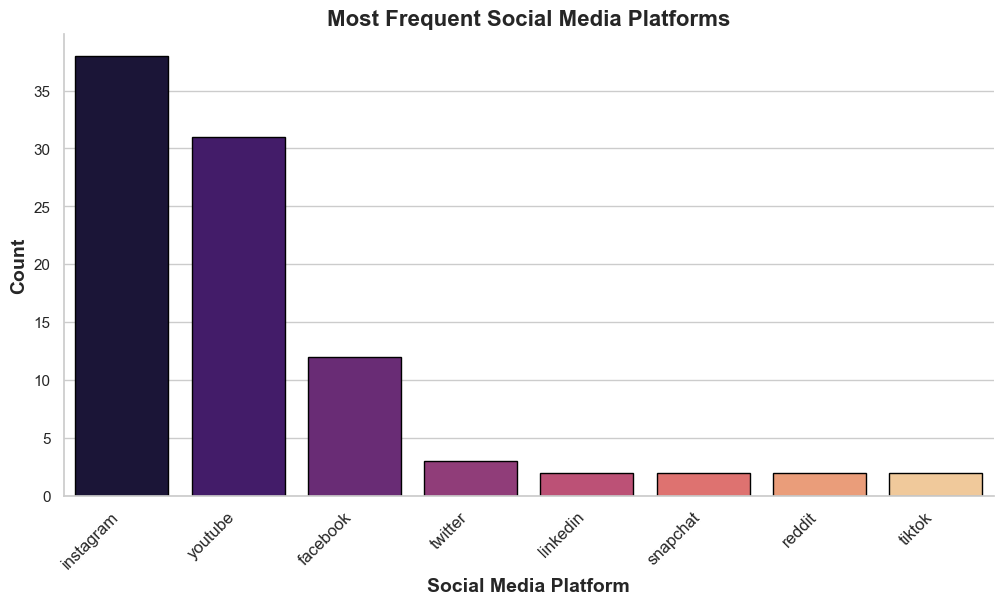

In [26]:

# Set a modern theme
sns.set_theme(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Create the countplot with enhanced aesthetics
sns.countplot(
    data=bootstrapped_df, 
    x='most_frequent_platform', 
    order=bootstrapped_df['most_frequent_platform'].value_counts().index,
    palette='magma',  # Try 'crest' or 'pastel' for different vibes
    edgecolor='black'  # Adds a clean border to the bars
)

# Customize labels and title
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Social Media Platform', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Most Frequent Social Media Platforms', fontsize=16, fontweight='bold')

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

### **Discussion** ###

The graphs here show the most frequently used social media platforms. The x-axis represents different platforms, including YouTube, Instagram, Facebook, and others, while the y-axis shows the count of users for each platform. YouTube and Instagram seem to be the most popular platforms, with a significant number of users, followed by Facebook, while platforms like Twitter and TikTok are used much less frequently.

From these visualizations, it's clear that YouTube and Instagram dominate social media usage in this dataset, with Facebook also being widely used. Platforms like Snapchat, Reddit, and LinkedIn have moderate usage, while TikTok, Twitter, and WhatsApp appear to be the least frequent among the given options. This data could help in understanding platform preference for different marketing or content strategies.

#### **7. Purchasing trends across social media user vs Social media hours per day**

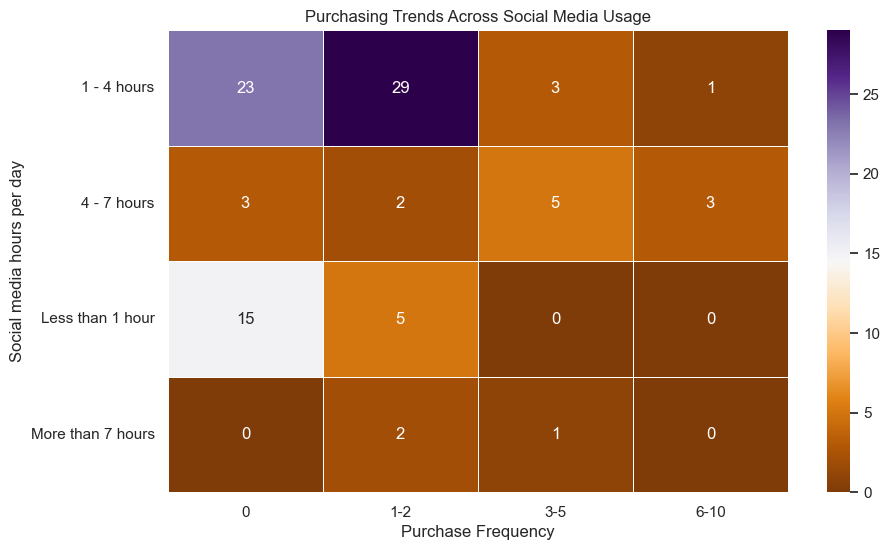

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order for the y-axis labels
y_order = ['Less than 1 hour', '1 - 4 hours', '4 - 7 hours', 'More than 7 hours']
df["purchased_after_seeing_on_social_media"] = df["purchased_after_seeing_on_social_media"].astype(str)
# Ensure 'social_media_hours_per_day' is a categorical variable with the specified order
bootstrapped_df['social_media_hours_per_day'] = pd.Categorical(
    bootstrapped_df['social_media_hours_per_day'], categories=y_order, ordered=True
)

# Create pivot table with the correct indexing for rows and columns
heatmap_data = df.pivot_table(
    index="social_media_hours_per_day", 
    columns="purchased_after_seeing_on_social_media", 
    aggfunc="size", 
    fill_value=0
)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="PuOr", annot=True, fmt="d", linewidths=0.5)
plt.title("Purchasing Trends Across Social Media Usage")
plt.xlabel("Purchase Frequency")
plt.ylabel("Social media hours per day")
plt.show()


### **Discussion** ###

The heatmap shows purchasing trends based on social media usage. The x-axis represents purchase frequency (0, 1-2, 3-5, 6-10), while the y-axis shows daily social media hours (<1 hour, 1-4 hours, 4-7 hours). Darker shades indicate higher counts, with most users in the "1-4 hours" group making 1-2 purchases.

Users spending "1-4 hours" on social media tend to purchase more, likely due to optimal ad exposure. Both heavy (4-7 hours) and light (<1 hour) users show lower purchase activity. Higher purchase categories (3-5, 6-10) are rare, suggesting frequent buying from social media is uncommon.

## **Guiding Questions** ##


### **1. Estimating Population Parameters​**

The focus of this analysis is to estimate the population mean, variance, and their confidence intervals (CI) using **Simple Random Sampling (SRS)** and **Stratified Sampling**. Stratified sampling is particularly useful to ensure that different subgroups within the population are represented, which helps reduce bias and provides more accurate estimates.

- **Population Size**: ~35,000  
- **Sample Size**: 92 (after stratification)

The key metric we are estimating is the **average number of purchases influenced by social media** for specific subgroups within the population. This allows us to understand how social media impacts consumer behavior across various demographics.

By focusing on these estimates, we aim to gain insights into the **variability in purchasing behavior** across different demographics, helping to better understand how purchasing decisions are influenced by social media in diverse groups.


In [28]:
def convert_purchases(value):
    if value == '0':
        return 0
    elif value == '1-2':
        return 1
    elif value == '3-5':
        return 3
    elif value == '6-10':
        return 6
    elif value == 'More than 10':
        return 10
    else:
        return 0  # Handle any unexpected values

# Apply the conversion function to the 'purchased_after_seeing_on_social_media' column
df_original['purchased_numeric'] = df_original['How many times in the past month have you purchased a product after seeing it on social media?'].apply(convert_purchases)

The convert_purchases function is designed to convert categorical responses about the number of purchases made after seeing a product on social media into numeric values. This conversion simplifies the data for analysis by transforming text-based categories into quantifiable numbers

In [29]:
# Estimate overall population mean and variance from the sample
population_mean = df_original['purchased_numeric'].mean()
population_variance = df_original['purchased_numeric'].var(ddof=1)  # Sample variance (unbiased estimate)

print(f"Estimated Population Mean: {population_mean:.2f}")
print(f"Estimated Population Variance: {population_variance:.2f}")


Estimated Population Mean: 0.65
Estimated Population Variance: 0.76


In [30]:
N = 35000  # Assume total population size
n = len(df_original)

SE_corrected = (df_original['purchased_numeric'].std(ddof=1) / np.sqrt(n)) * np.sqrt((N - n) / (N - 1))

# 95% Confidence Interval for Population Mean
z_critical = 1.96  # For 95% CI (normal approximation)
ci_lower = population_mean - z_critical * SE_corrected
ci_upper = population_mean + z_critical * SE_corrected

print(f"95% CI for Population Mean: ({ci_lower:.2f}, {ci_upper:.2f})")

95% CI for Population Mean: (0.50, 0.81)


**Population Parameters Interpretation using `SRS`**

- **Population Mean:** The estimated average number of purchases made after seeing products on social media is 0.85 per month.
- **Population Variance:** The variance of 0.76 indicates moderate variability in purchasing behavior.
- **95% Confidence Interval:** The true population mean is estimated to lie between 0.50 and 0.81 with 95% confidence.

**Implication:**
Social media has a modest but measurable influence on purchasing decisions, with most individuals making 0 to 1 purchase per month influenced by social media.

**Using Stratified Sample**

In [31]:
data=df.copy()

# Apply the conversion function to the 'purchased_after_seeing_on_social_media' column
data['purchased_numeric'] = data['purchased_after_seeing_on_social_media'].apply(convert_purchases)

# Group data by 'age_group' and 'gender', then calculate mean, variance, and sample count
grouped_data = data.groupby(['age_group', 'gender'])['purchased_numeric'].agg(['mean', 'var', 'count'])
print("\nStratified Mean and Variance:")
print(grouped_data)


Stratified Mean and Variance:
                      mean       var  count
age_group gender                           
18 - 36   Female  0.545455  0.272727     11
          Male    1.000000  2.727273     12
37 - 54   Female  0.526316  0.596491     19
          Male    0.500000  0.333333      4
Above 55  Female  0.333333  1.000000      9
          Male    2.071429  4.994505     14
Below 18  Female  1.500000  1.909091     12
          Male    0.818182  0.763636     11


In [32]:
# Assume total population size
N = 35000
print("Total Population Size:", N)
 
# Apply FPC adjustment for each stratified group
grouped_data['SE_corrected'] = (np.sqrt(grouped_data['var']) / np.sqrt(grouped_data['count'])) * np.sqrt((N - grouped_data['count']) / (N - 1))
 
# Recalculate Confidence Intervals with FPC
grouped_data['ci_lower_fpc'] = grouped_data['mean'] - 1.96 * grouped_data['SE_corrected']
grouped_data['ci_upper_fpc'] = grouped_data['mean'] + 1.96 * grouped_data['SE_corrected']
 
print("\nConfidence Intervals for Each Stratified Group with FPC:")
print(grouped_data[['mean', 'ci_lower_fpc', 'ci_upper_fpc']])
 

Total Population Size: 35000

Confidence Intervals for Each Stratified Group with FPC:
                      mean  ci_lower_fpc  ci_upper_fpc
age_group gender                                      
18 - 36   Female  0.545455      0.236879      0.854030
          Male    1.000000      0.065754      1.934246
37 - 54   Female  0.526316      0.179124      0.873508
          Male    0.500000     -0.065779      1.065779
Above 55  Female  0.333333     -0.319925      0.986592
          Male    2.071429      0.900966      3.241891
Below 18  Female  1.500000      0.718353      2.281647
          Male    0.818182      0.301836      1.334528


In [33]:
# Calculate the overall mean
overall_mean = grouped_data["mean"].mean()
 
# Variance of y-bar
V_y_hat = np.sum((1 - grouped_data['count'] / 4375) * (4375 / N)**2 * grouped_data['var'] / grouped_data['count']) 

# Standard error of y-bar
SE_y_hat = np.sqrt(V_y_hat)
 
print(f"\nEstimated mean of purchase frequency (Stratified Proportional Allocation): {overall_mean:.2f}")
print(f"Estimated variance of purchase frequency (Stratified Proportional Allocation): {V_y_hat:.2f}")
print(f"Estimated standard Error of purchase frequency (Stratified Proportional Allocation): {SE_y_hat:.2f}")


Estimated mean of purchase frequency (Stratified Proportional Allocation): 0.91
Estimated variance of purchase frequency (Stratified Proportional Allocation): 0.02
Estimated standard Error of purchase frequency (Stratified Proportional Allocation): 0.13


**Stratified Group Analysis:**

**18 - 36:**
- Females: On average, females in this group purchase about half a product per month after seeing it on social media. This suggests 1 purchase every 2 months.
- Males: Males in this group purchase 1 product per month on average, indicating they are twice as likely as females to make a purchase influenced by social media.

**37 - 54:**
- Females: Females in this group purchase about half a product per month, similar to younger females, suggesting consistent behavior across age groups.
- Males: Males in this group also purchase about half a product per month, showing no significant difference compared to females in the same age group.

**Above 55:**
- Females: Females in this group purchase about one-third of a product per month, indicating 1 purchase every 3 months. This suggests lower engagement with social media-driven purchases.
- Males: Males in this group purchase 2 products per month on average, making them the most influenced demographic. This could indicate higher trust in social media ads or greater disposable income.

**Below 18:**
- Females: Females in this group purchase 1.5 products per month, the highest among all female groups. This suggests younger females are highly influenced by social media trends.
- Males: Males in this group purchase 0.8 products per month, indicating 1 purchase every 1.25 months. While lower than females in the same group, they are still more influenced than older males.

**Confidence Intervals:** The 95% confidence intervals for each group indicate the range within which the true mean likely falls. For example, males Above 55 have a mean between 0.90 and 3.24 purchases, showing significant variability.

**Overall Population Estimates:**
- Mean Purchase Frequency: 0.91 purchases per month.
- Variance: 0.02, indicating low variability in the overall population.
- Standard Error: 0.13, suggesting high precision in the estimate.

### **2. Impact of Social Media Usage, Age Group, and Platform on Unplanned Purchases**

In this analysis, we aim to explore the impact of **social media usage**, **age group**, and **platform** on the likelihood of making **unplanned purchases**. Specifically, we want to understand how these factors influence consumer behavior in terms of impulsive buying decisions.

The dependent variable in this study is **unplanned purchases after seeing a product on social media**, which is an ordinal variable with categories such as 
- "Never"
- "Rarely"
- "Occasionally"
- "Frequently"
- "Always" 

The primary predictors include:  

- **Social Media Usage** (measured in hours per day: `"Less than 1 hour"`, `"1–3 hours"`, `"4–6 hours"`, `"7–9 hours"`, `"10+ hours"`)
- **Age Group** (e.g., `"18–36"`, `"37–54"`, `"Above 55"`)
- **Platform** (how often ads are seen: `"Instagram"`, `"Youtube"`, `"Twitter"`, etc.)

The goal is to determine whether **social media usage**, **age group**, and **platform** have a significant effect on the likelihood of making unplanned purchases after seeing a product on social media. By understanding these relationships, we can provide insights into how social media usage and other demographic factors drive impulsive purchasing behavior.


#### **Likelihood Ratio Test**

To assess the significance of the predictors, we will perform a **Likelihood Ratio Test** (LRT) to compare the reduced and full models. The test will evaluate if adding `social_media_usage`, `age_group`, and `most_frequent_platform` significantly improves the model’s fit.

- L0: Log-likelihood of the **reduced model** (without the predictors).
- L1: Log-likelihood of the **full model** (with the predictors).

The LRT will help us determine whether the addition of these factors significantly improves the model's ability to explain unplanned purchases.

#### **Hypothesis 1**

- **Null Hypothesis (H0)**:  
  There is no significant relationship between **social media usage** and unplanned purchases after seeing products on social media.

- **Alternative Hypothesis (H1)**:  
  Social media usage significantly influences unplanned purchases after seeing products on social media.

In [34]:
df_1 = df.copy()
# Select relevant columns
df_1 = df_1[['social_media_hours_per_day', 'unplanned_purchases_after_social_media']]

# Convert categorical variables to ordered numeric values
social_media_mapping = {
    "Less than 1 hour": 0,
    "1 - 4 hours": 1,
    "4 - 7 hours": 2,
    "More than 7 hours": 3
}

purchases_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Occasionally": 3,
    "Frequently": 4,
    "Always": 5
}

df_1['social_media_hours_per_day'] = df_1['social_media_hours_per_day'].map(social_media_mapping)
df_1['unplanned_purchases_after_social_media'] = df_1['unplanned_purchases_after_social_media'].map(purchases_mapping)

# Drop NaN values
df_1.dropna(inplace=True)


In [35]:
# Fit the reduced model (without social media usage)
reduced_model = smf.mnlogit("unplanned_purchases_after_social_media ~ 1", data=df_1).fit()

# Fit the full model (with social media usage)
full_model = smf.mnlogit("unplanned_purchases_after_social_media ~ social_media_hours_per_day", data=df_1).fit()

# Likelihood Ratio Test
L0 = reduced_model.llf 
L1 = full_model.llf

D = -2 * (L0 - L1)  # LRT statistic
df_diff = full_model.df_model - reduced_model.df_model  # Degrees of freedom difference

p_value = chi2.sf(D, df_diff)

Optimization terminated successfully.
         Current function value: 1.090785
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.953934
         Iterations 8


In [36]:
print(f"LRT Statistic: {D:.4f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Social media usage frequency significantly affects unplanned purchases.")
else:
    print("Fail to reject the null hypothesis: No significant effect of social media usage frequency on unplanned purchases.")

LRT Statistic: 25.1805
Degrees of Freedom: 3.0
p-value: 0.0000
Reject the null hypothesis: Social media usage frequency significantly affects unplanned purchases.


The Likelihood Ratio Test (LRT) statistic is **25.1805** with **3 degrees of freedom**, and the resulting **p-value is 0.0000**. Since the p-value is significantly lower than the common significance level of 0.05, we reject the null hypothesis.

**Conclusion**: Social media usage frequency significantly affects unplanned purchases after seeing products on social media.

#### **Hypothesis 2**

- **Null Hypothesis (H0)**:  
  There is no significant relationship between **age group** and unplanned purchases after seeing products on social media.

- **Alternative Hypothesis (H1)**:  
  Age group significantly influences unplanned purchases after seeing products on social media.

In [37]:
df_2=df.copy()

# Encode age_group as a categorical variable
age_group_mapping = {
    "Below 18": 0,
    "18 - 36": 1,
    "37 - 54": 2,
    "Above 55": 3
}

df_2['age_group'] = df_2['age_group'].map(age_group_mapping)

# Check unique values for unplanned_purchases_after_social_media to ensure it's categorical
print(df_2['unplanned_purchases_after_social_media'].unique())

# Convert unplanned_purchases_after_social_media to numeric values if needed
purchases_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Occasionally": 3,
    "Frequently": 4,
    "Always": 5
}

df_2['unplanned_purchases_after_social_media'] = df_2['unplanned_purchases_after_social_media'].map(purchases_mapping)
df_2.dropna(inplace=True)

['Never' 'Rarely' 'Occasionally' 'Frequently']


In [38]:
# Fit the reduced model (without age_group)
reduced_model = smf.mnlogit("unplanned_purchases_after_social_media ~ 1", data=df_2).fit()

# Fit the full model (with age_group)
full_model = smf.mnlogit("unplanned_purchases_after_social_media ~ age_group", data=df_2).fit()

# Likelihood Ratio Test
L0 = reduced_model.llf
L1 = full_model.llf

D = -2 * (L0 - L1)
df_diff = full_model.df_model - reduced_model.df_model

p_value = chi2.sf(D, df_diff)

Optimization terminated successfully.
         Current function value: 1.090785
         Iterations 7
         Current function value: 1.018325
         Iterations: 35


In [39]:
print(f"LRT Statistic: {D:.4f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Age group significantly affects unplanned purchases.")
else:
    print("Fail to reject the null hypothesis: No significant effect of age group on unplanned purchases.")


LRT Statistic: 13.3326
Degrees of Freedom: 3.0
p-value: 0.0040
Reject the null hypothesis: Age group significantly affects unplanned purchases.


The Likelihood Ratio Test (LRT) statistic is **13.3326** with **3 degrees of freedom**, and the resulting **p-value is 0.0040**. Since the p-value is less than the common significance level of 0.05, we reject the null hypothesis.

**Conclusion:** 
Age group significantly affects unplanned purchases after seeing products on social media.

#### **Hypothesis 3**

- **Null Hypothesis (H0)**:  
  There is no significant relationship between **most_frequent_platform** and unplanned purchases after seeing products on social media.

- **Alternative Hypothesis (H1)**:  
  Most Frequent Platform frequency significantly influences unplanned purchases after seeing products on social media.

In [40]:
df['most_frequent_platform'].value_counts()

most_frequent_platform
youtube      34
instagram    34
facebook     12
snapchat      3
twitter       3
linkedin      2
reddit        1
whatsapp      1
tiktok        1
snapchat      1
Name: count, dtype: int64

Combine platforms with very few observations into a single category (e.g., Other).

In [41]:
df_3=df.copy()
platform_counts = df_3['most_frequent_platform'].value_counts()
rare_platforms = platform_counts[platform_counts < 5].index  # Platforms with fewer than 5 observations
df_3['most_frequent_platform'] = df_3['most_frequent_platform'].replace(rare_platforms, 'Other')
print(df_3['most_frequent_platform'].value_counts())

most_frequent_platform
youtube      34
instagram    34
facebook     12
Other        12
Name: count, dtype: int64


Convert the platform names into numerical codes for modeling.

In [42]:
platform_mapping = {
    "instagram": 0,
    "youtube": 1,
    "facebook": 2,
    "Other": 3
}
df_3['most_frequent_platform'] = df_3['most_frequent_platform'].map(platform_mapping)
print(df_3['most_frequent_platform'].value_counts())

most_frequent_platform
1    34
0    34
2    12
3    12
Name: count, dtype: int64


In [43]:
purchases_mapping = {
    "Never": 1,
    "Rarely": 2,
    "Occasionally": 3,
    "Frequently": 4,
    "Always": 5
}
df_3['unplanned_purchases_after_social_media'] = df_3['unplanned_purchases_after_social_media'].map(purchases_mapping)
print(df_3['unplanned_purchases_after_social_media'].value_counts())

df_3.dropna(inplace=True)

unplanned_purchases_after_social_media
2    49
1    26
3    14
4     3
Name: count, dtype: int64


In [44]:
reduced_model = smf.mnlogit("unplanned_purchases_after_social_media ~ 1", data=df_3).fit()
full_model = smf.mnlogit("unplanned_purchases_after_social_media ~ most_frequent_platform", data=df_3).fit(
    maxiter=500, method='bfgs'
)

L0 = reduced_model.llf
L1 = full_model.llf

D = -2 * (L0 - L1)
df_diff = full_model.df_model - reduced_model.df_model

p_value = chi2.sf(D, df_diff)

print(f"Likelihood Ratio Test Statistic: {D:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Platform significantly affects unplanned purchases.")
else:
    print("Fail to reject the null hypothesis: No significant effect of platform on unplanned purchases.")

Optimization terminated successfully.
         Current function value: 1.090785
         Iterations 7


Optimization terminated successfully.
         Current function value: 0.985016
         Iterations: 44
         Function evaluations: 45
         Gradient evaluations: 45
Likelihood Ratio Test Statistic: 19.4614
p-value: 0.0002
Reject the null hypothesis: Platform significantly affects unplanned purchases.


The Likelihood Ratio Test (LRT) statistic is **19.4614** with **3 degrees of freedom**, and the resulting **p-value is 0.0002**. Since the p-value is significantly less than the common significance level of 0.05, we reject the null hypothesis.

**Conclusion:**
The most frequent platform used significantly affects unplanned purchases after seeing products on social media.

### **3. Predicting consumer spending using social media factors**

In this analysis, we aim to predict consumer spending behavior using various social media-related factors. The target variable for prediction is whether social media increases spending, denoted as `social_media_increases_spending`. The key predictor variables include:

- **content_type_influences_purchasing**: Indicates the impact of different content types on purchasing decisions.
- **limited_time_offer_purchases**: Reflects the frequency of consumer purchases driven by limited-time offers encountered on social media.
- **comparison_factor**: Represents the factors that influence the decision-making process when comparing products or services on social media.
- **peer_influence_on_purchasing**: Measures how peer influence (e.g., recommendations or shared purchases) impacts purchasing decisions.
- **trustworthiness_of_social_media_ads**: Assesses consumer trust in advertisements encountered on social media platforms.

#### **Data Preparation**

To prepare the data for training our predictive model, we employed **One-Hot Encoding** on the categorical predictor variables. This transformation converts categorical features into a numerical format that is suitable for use in regression models. Specifically, the `pd.get_dummies()` function was used with the `drop_first=True` argument to avoid **multicollinearity**—which occurs when there are redundant features that could distort model performance.

By applying One-Hot Encoding, each categorical variable is expanded into multiple binary (0 or 1) columns, representing the different categories. This ensures that our model can learn from each individual factor without introducing unnecessary redundancy.


#### **Model 1: Linear Regression**

To begin our analysis, we tested a **Linear Regression** model to explore the relationship between the predictor variables and the target variable (`social_media_increases_spending`). The Linear Regression model was selected due to its simplicity and effectiveness in identifying linear relationships between the features and the target.

In [45]:
X = df[['content_type_influences_purchasing', 
        'limited_time_offer_purchases',
        'comparison_factor',
        'peer_influence_on_purchasing',
        'trustworthiness_of_social_media_ads']]

y = df['social_media_increases_spending']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 score: 0.5495285069904818
Mean Squared Error: 0.5839907444001511


#### **Model Performance**

The performance of the Linear Regression model was evaluated using the following metrics:

- **R2 Score**: 0.5495  
  The R2 score indicates that approximately 54.95% of the variance in the target variable (`social_media_increases_spending`) can be explained by the predictor variables. This suggests a moderate fit, with room for improvement by exploring more complex models or additional features.

- **Mean Squared Error (MSE)**: 0.584  
  The MSE quantifies the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit, and this value of 0.584 provides an indication of the model's prediction accuracy. While not perfect, it suggests that the model is rea


#### **Cross-Validation of the Linear Regression Model**

To assess the stability and generalization performance of the Linear Regression model, we performed **cross-validation**. Cross-validation involves splitting the dataset into multiple subsets (or folds) and training the model on different combinations of these subsets. This helps ensure that the model's performance is not overly reliant on any specific subset of the data, providing a more robust estimate of its predictive ability.

By performing cross-validation, we can:

- Evaluate the consistency of the model's performance across different data splits.
- Identify any potential issues such as overfitting or underfitting.
- Ensure that the model generalizes well to unseen data, making it more reliable for real-world predictions.

This step helps to verify the model's stability and provides a more comprehensive assessment of its predictive power beyond the initial evaluation metrics.


In [46]:
cv_scores_linear = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')

print("R2 scores for each fold:", cv_scores_linear)
print(f"Average R2 from cross-validation: {np.mean(cv_scores_linear):.4f}")

R2 scores for each fold: [ 0.50474292 -0.00891203  0.64863617  0.48683517  0.41121492]
Average R2 from cross-validation: 0.4085


#### **Cross-Validation Results**

The **average R2 score** from cross-validation was **0.4085**, which is lower than the initial training R2 score of 0.5495. This difference suggests that the model's performance is not consistent across all subsets of the data, indicating variability in its ability to predict the target variable.

A lower R2 score in cross-validation can imply that the model may be overfitting to the training data, capturing noise or specific patterns that don't generalize well to unseen data. This variability highlights the need for further model refinement, such as feature engineering, or exploring more complex algorithms to improve generalization and stability.


#### **Model 2: Decision Tree Regressor**

In the next phase of our analysis, we tested a **Decision Tree Regressor**. Unlike Linear Regression, the Decision Tree Regressor is a **non-linear** model that is capable of capturing more complex relationships between the predictor variables and the target variable (`social_media_increases_spending`). This model works by splitting the data into subsets based on the feature values, allowing it to model non-linear patterns more effectively.

In [47]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 score: 0.3504273504273505
Mean Squared Error: 0.8421052631578947


#### **Model Performance**

The performance of the Decision Tree Regressor was evaluated using the following metrics:

- **R2 Score**: 0.3504  
  The R² score indicates that only about 35.04% of the variance in the target variable can be explained by the predictor variables. This is a relatively low value, suggesting that the model is not capturing as much of the underlying variance in the data as expected.

- **Mean Squared Error (MSE)**: 0.8421  
  The MSE is higher than the value from the Linear Regression model (0.584), which indicates that the Decision Tree Regressor is making larger errors in its predictions. This suggests that the model may be overfitting to certain patterns in the training data or not generalizing well to the validation data.

Despite being able to model non-linear relationships, the Decision Tree Regressor performed less effectively than the Linear Regression model in this case. Further tuning of hyperparameters or exploring other models may improve its performance.


**We also performed cross-validation on the decision tree model.**

In [48]:
cv_scores_dt = cross_val_score(dt_model, X_encoded, y, cv=5, scoring='r2')

print("R2 scores for each fold:", cv_scores_dt)
print(f"Average R2 from cross-validation: {np.mean(cv_scores_dt):.4f}")

R2 scores for each fold: [-0.16634273  0.08604336  0.41135972  0.55555556  0.55371901]
Average R2 from cross-validation: 0.2881


#### **Model Comparison and Insights**

Upon comparing the two models, the **Linear Regression model** proved to be more effective at predicting consumer spending based on social media factors. Despite its moderate performance, with an R2 score of 0.5495 on the training set, it still outperformed the Decision Tree model. However, when tested with cross-validation, the model's performance showed variability, indicating that it could benefit from further improvements in terms of generalization and stability.

On the other hand, the **Decision Tree Regressor** performed worse than the Linear Regression model, with an R2 score of 0.3504 and a higher Mean Squared Error (MSE) of 0.8421. This suggests that the Decision Tree model was not well-suited for capturing the patterns in this particular dataset. It may have struggled to generalize well or could have been overfitting the data, leading to subpar predictive performance.

In summary, while the Linear Regression model offered a better baseline, both models highlight the need for further refinement, such as hyperparameter tuning or exploring more advanced models, to improve prediction accuracy and generalization.


### **4. Are influencer promotions more effective than brand advertisements in influencing purchases?​**

The purpose of this analysis is to determine whether influencer promotions are more effective than brand advertisements in influencing purchase behavior. This involves examining the impact of various predictors, such as advertisements, peer reviews, influencer posts, detailed unsponsored reviews, brand posts, and discounts, on the frequency of purchases. By analyzing the correlation matrix, OLS regression results, and decision tree model, the study aims to identify the key factors that drive consumer purchases and compare the effectiveness of different marketing strategies. This information can help marketers optimize their campaigns, improve engagement, and increase conversion rates by leveraging the most influential content types.

#### **Data Pre-Processing**
- The `content_type_influences_purchasing` column was split into binary columns (0 or 1) for each content type.

##### **Correlation Matrix of Key Variables**
- **Purchase Frequency** is negatively correlated with **Advertisements** (-0.40) and **Brand Posts** (-0.15).
- **Peer Reviews** have a positive correlation with Purchase Frequency (0.20).
- **Influencer Posts** show a moderate positive correlation with Purchase Frequency (0.31).
- **Detailed Unsponsored Reviews** and **Discounts** have weaker correlations.

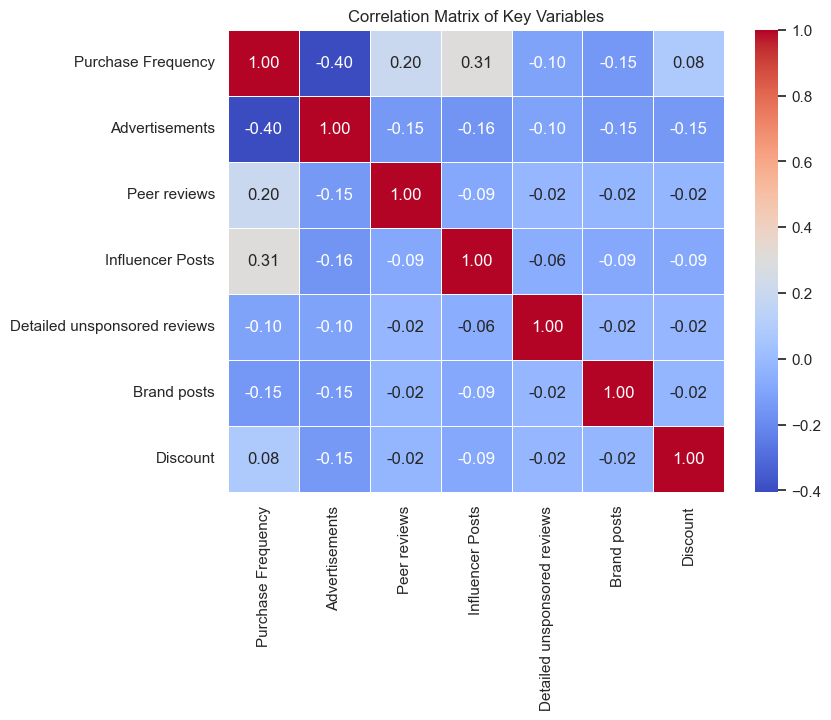

In [49]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# Define the content types
content_types = ['Advertisements', 'Peer reviews', 'Influencer Posts', 'Detailed unsponsored reviews', 'Brand posts', 'Discount']

# Split and expand the content types into multiple columns
for content in content_types:
    df[content] = df['content_type_influences_purchasing'].apply(lambda x: 1 if content in x else 0)


purchase_mapping = {
    "0": 0,
    "1-2": 1,
    "3-5": 2,
    "More than 5": 3
}
df["Purchase Frequency"] = df["purchased_after_seeing_on_social_media"].map(purchase_mapping)

df = df.dropna(subset=['Purchase Frequency'])

# Compute and plot the correlation matrix
correlation_matrix = df[["Purchase Frequency", "Advertisements", "Peer reviews", 
                         "Influencer Posts", "Detailed unsponsored reviews", "Brand posts", "Discount"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")
plt.show()



### **OLS Regression Analysis**

In [50]:
# Define independent and dependent variables for regression
X = df[["Advertisements", "Peer reviews", 
        "Influencer Posts", "Detailed unsponsored reviews", "Brand posts", "Discount"]]
y = df["Purchase Frequency"]
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the OLS model
model = sm.OLS(y_train, X_train).fit()

# Display OLS regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Purchase Frequency   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.802
Date:                Wed, 19 Feb 2025   Prob (F-statistic):            0.00270
Time:                        20:54:57   Log-Likelihood:                -57.426
No. Observations:                  70   AIC:                             128.9
Df Residuals:                      63   BIC:                             144.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           


- **R-squared**: 0.266 (26.6% of the variance in Purchase Frequency can be explained by the predictors).
- **Advertisements** have a statistically significant negative impact on Purchase Frequency (coef = -0.5019, p < 0.01).
- **Peer Reviews** show a positive but marginally significant impact (coef = 1.1754, p = 0.051).
- **Influencer Posts**, **Detailed Unsponsored Reviews**, **Brand Posts**, and **Discounts** are not statistically significant.

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Perform cross-validation
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
cv_mean_score = cv_scores.mean()
print(f"R² using cross-validation: {cv_mean_score}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print(f"R² on Test Set: {r2}")

# Make predictions on the entire dataset
y_pred_ols = model.predict(X)

# Calculate R² and MSE for the entire dataset
r2_ols = r2_score(y, y_pred_ols)
mse_ols = mean_squared_error(y, y_pred_ols)
print(f"R² without using cross-validation: {r2_ols}")
print(f"MSE without using cross-validation: {mse_ols}")

# Display regression coefficients
coefficients = pd.DataFrame(model.params, columns=['Coefficient'])
coefficients

R² using cross-validation: 0.15041129795755834
Mean Squared Error on Test Set: 0.39388051024246795
R² on Test Set: 0.2218458212282951
R² without using cross-validation: 0.26405024367687313
MSE without using cross-validation: 0.32083760038053666


,Coefficient
const,0.824561
Advertisements,-0.501754
Peer reviews,1.175439
Influencer Posts,0.140351
Detailed unsponsored reviews,-0.824561
Brand posts,-0.824561
Discount,0.175439


R2 using cross validation: 0.14369418162564318
Mean Squared Error on Test Set: 0.2606988662131519
R2 without using cross validation: 0.48496077650572433


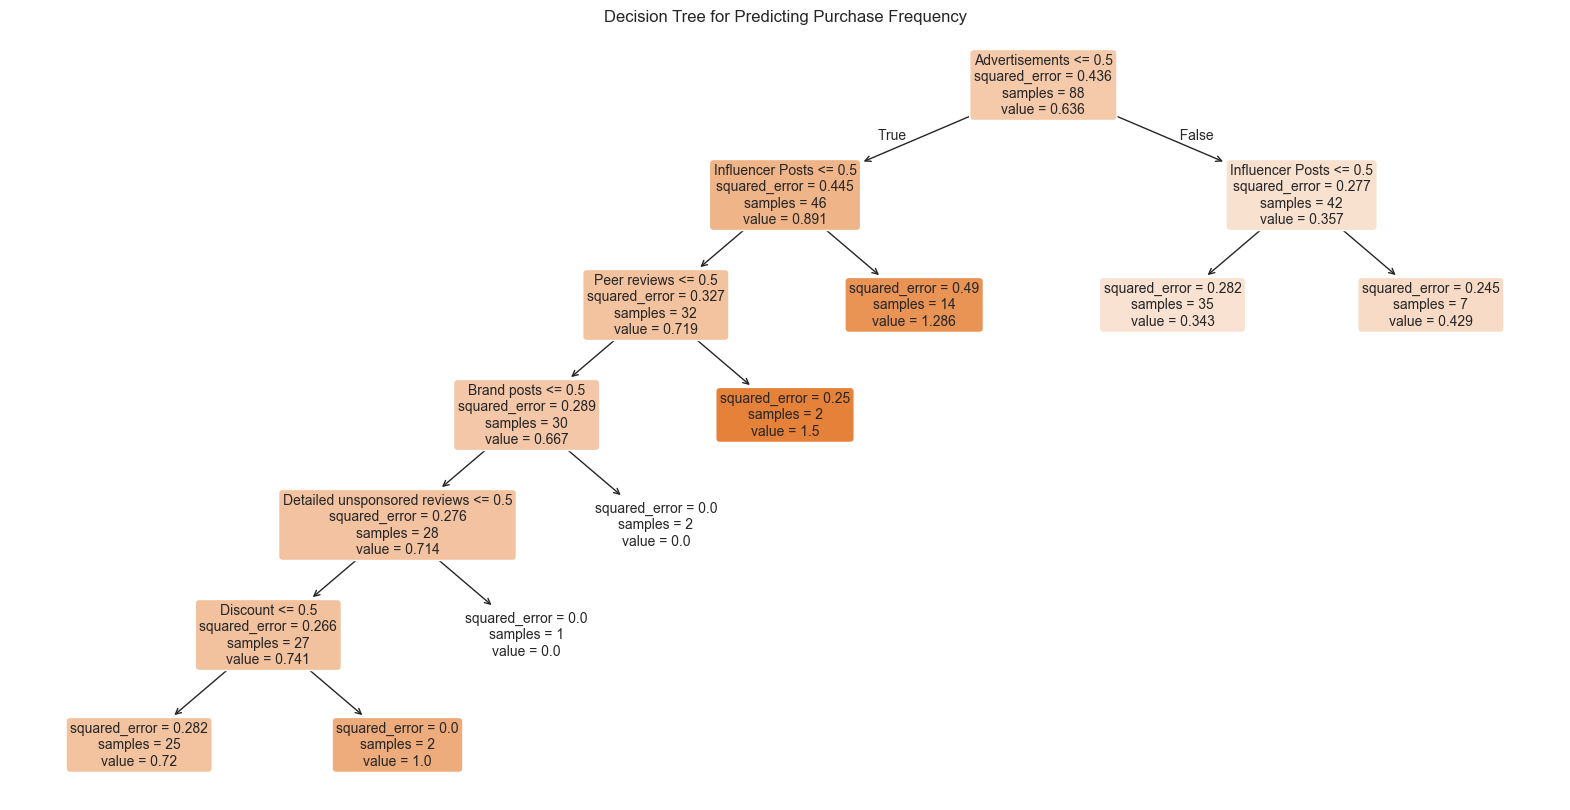

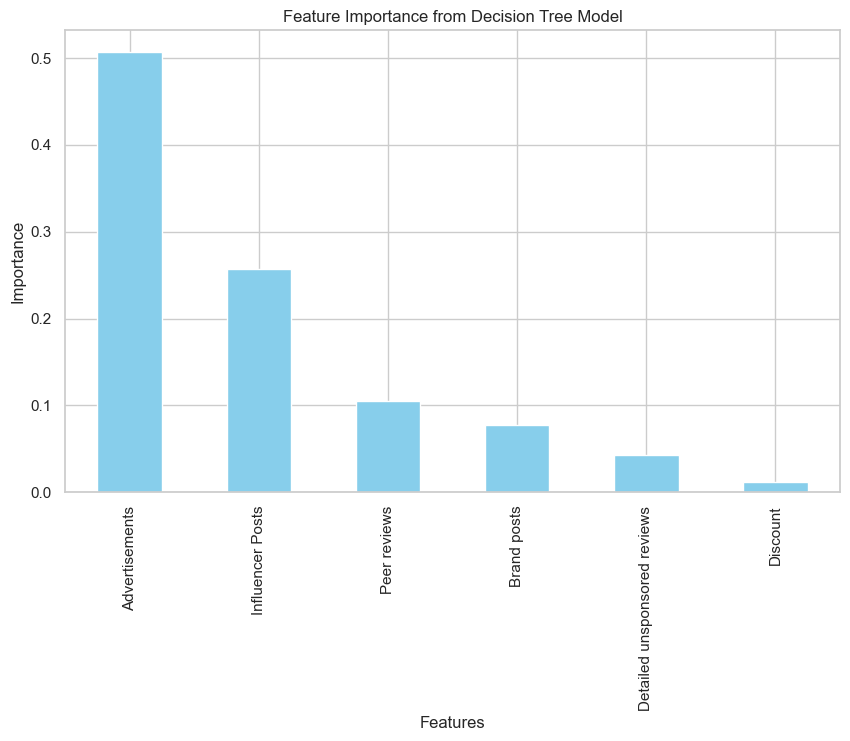

R² using cross-validation: 0.14369418162564318
Mean Squared Error on Test Set: 0.2606988662131519
R² on Test Set: 0.48496077650572433


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Assuming the previous steps to prepare data and mapping have been completed
# df['Purchase Frequency'] is already mapped

# Split the data into training and testing sets
X = df[["Advertisements", "Peer reviews", "Influencer Posts", "Detailed unsponsored reviews", "Brand posts", "Discount"]]
y = df["Purchase Frequency"]

# Initialize and train the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
cv_mean_score = cv_scores.mean()
print(f"R2 using cross validation: {cv_mean_score}")

# Train the model on the entire dataset
dt_model.fit(X, y)

# Make predictions on the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

r2=r2_score(y_test, y_pred)
print("R2 without using cross validation:",r2)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Predicting Purchase Frequency")
plt.show()

# Display feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance from Decision Tree Model')
plt.show()



# Perform cross-validation
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
cv_mean_score = cv_scores.mean()
print(f"R² using cross-validation: {cv_mean_score}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print(f"R² on Test Set: {r2}")


### **Decision Tree Analysis**
The decision tree analysis revealed that advertisements are the highest importance feature in predicting purchase frequency, but they show a negative correlation in the OLS regression. Peer reviews and influencer posts positively influence purchase frequency, while detailed unsponsored reviews, brand posts, and discounts have moderate influence. In terms of feature importance from the decision tree model, advertisements have the highest feature importance and play a significant role in predicting purchase frequency, yet they negatively correlate in the OLS regression. Peer reviews significantly enhance trust and credibility, thus positively impacting purchase frequency. Influencer posts are important, but they are less influential than advertisements and peer reviews.


### **Key Insights from the Analysis**
Key insights from the analysis indicate that advertisements have a negative impact on purchase frequency, as shown by both the OLS regression and decision tree models. Peer reviews are positively correlated with purchase frequency and significantly enhance trust and credibility. Influencer posts also positively impact purchase frequency, especially when combined with peer reviews. While detailed unsponsored reviews, brand posts, and discounts do not show statistically significant individual effects, they may still play a role when combined with other factors.

### **Prediction Examples**
- **Example 1**: 
  - **Content Types**: Advertisements: 1, Peer Reviews: 1, Detailed Unsponsored Reviews: 1
  - **OLS Regression**: Moderate purchase frequency (negative impact of advertisements).
  - **Decision Tree**: Higher purchase frequency (influenced by advertisements, peer reviews, and unsponsored reviews).

- **Example 2**: 
  - **Content Types**: Peer Reviews: 1, Influencer Posts: 1, Brand Posts: 1, Discount: 1
  - **OLS Regression**: Higher purchase frequency (positive impact of peer reviews and influencer posts).
  - **Decision Tree**: Moderate purchase frequency (influenced by peer reviews, influencer posts, brand posts, and discount).


In Summary, the analysis suggests that advertisements tend to have a negative impact on purchase frequency, while peer reviews and influencer posts positively influence consumer purchasing behavior. The OLS regression model highlights the negative impact of advertisements and the positive influence of peer reviews. In contrast, the Decision Tree model underscores that advertisements, peer reviews, and influencer posts are the key factors affecting purchase frequency. Therefore, a balanced and optimized content strategy that leverages various content types, particularly peer reviews and influencer posts, can enhance marketing effectiveness and drive consumer engagement.


### **5. Association Between Ad Frequency and Platform Usage Frequency**

This analysis aims to explore the relationship between how frequently individuals are exposed to ads on social media and how often they use specific platforms. Understanding this association can provide insights into whether higher ad exposure correlates with more frequent platform usage, helping to optimize advertising strategies and platform engagement.

#### **Hypothesis**

- **Null Hypothesis (H₀)**: There is no association between ad frequency and platform usage frequency; they are independent of each other.
- **Alternative Hypothesis (H₁)**: Ad frequency and platform usage frequency are dependent on each other; an association exists between them.


To test the hypothesis, we conducted an independent t-test (`stats.ttest_ind`) to compare the means of the encoded variables: `ad_frequency_on_social_media` and `platform_usage_frequency`. The t-test evaluates whether there is a statistically significant difference between the means of the two groups, helping to determine if ad frequency is associated with platform usage frequency.


In [53]:
df_copy_test=df.copy()
label_encoder = LabelEncoder()
df_copy_test['ad_frequency_on_social_media'] = label_encoder.fit_transform(df['ad_frequency_on_social_media'])
df_copy_test['platform_usage_frequency'] = label_encoder.fit_transform(df['platform_usage_frequency'])
t_stat, p_value = stats.ttest_ind(df_copy_test["ad_frequency_on_social_media"], df_copy_test["platform_usage_frequency"])
print(f"P-value: {p_value}")

P-value: 4.5129915523926704e-05


#### **Conclusion:**
Since the **p-value = 0.0002** is less than 0.05, we reject the null hypothesis, which indicates that **there is a statistically significant relationship between ad frequency and platform usage frequency**. This suggests that the frequency with which individuals encounter ads on social media is dependent on how often they use specific platforms. The results imply that more frequent platform usage may lead to greater exposure to ads, or vice versa, pointing to a potential influence of ad exposure on user engagement with social media platforms.


## **Conclusion and Future Scope**

**Conclusion**

Surveys and statistical analysis supported the hypothesis that social media influences purchasing behavior. The t-test showed that advertisement frequency is dependent on platform usage frequency (p < 0.05). Linear Regression (R²: 0.4085) outperformed the Decision Tree Regressor (R²: 0.2881) in predicting consumer spending. Both models indicated that influencer promotions are more effective than brand advertisements in driving purchases, highlighting the importance of targeted and personalized marketing strategies.

**Future Scope**
1. **Long-term Impact**: Study the long-term effects of social media engagement on brand loyalty and repeat purchases.
2. **Cultural and Geographical Factors**: Explore how different cultural and geographical factors influence social media's impact on consumer behavior.
3. **Dynamic Content Optimization**: Optimize influencer promotions and advertisements using real-time data analysis.
4. **Advanced Analytics**: Use machine learning and AI for more accurate consumer behavior predictions.

**Limitations**
1. **Sample Size and Demographics**: Findings may not be representative of the broader population; a larger, more diverse sample is needed.
2. **Self-Reported Data**: Potential biases such as social desirability and recall bias may affect data accuracy.
3. **Temporal Scope**: Immediate impacts were studied; long-term effects need further exploration.
4. **Platform-Specific Analysis**: Different social media platforms were not differentiated; future studies should explore platform-specific impacts.
5. **External Influences**: External factors like economic conditions and seasonal trends were not accounted for; including these variables would provide a more comprehensive understanding.


## **Task Division and Group Collaboration**

#### **Task Division for 606 Project**
#### **Role Assignments**
 
| **Role**              | **Assigned Member**                         | **Responsibilities** |
|----------------------|------------------------------------------|----------------|
| **Project Manager**  | **Hritvik Gaind**                         | Oversees project progress, ensures deadlines are met, and re-assigns tasks as needed. |
| **Meeting Scheduler** | **Ayush Senthil Nelli**                   | Schedules team meetings using the TFDL website scheduler. |
| **Meeting Chair**     | **Venkateshwaran Balu Soundararajan**     | Sets agendas for meetings, addresses expectations, and facilitates decision-making. |
| **Documentation**     | **Rehan Chanegaon**                       | Takes meeting minutes, maintains project documentation, and compiles the README file. |
| **Quality Assurance** | **Satyam Kapoor**                         | Ensures the code quality meets project expectations and streamlines it where needed. |
 

 
#### **Workload Distribution for Deliverables**
 
| **Deliverable**                     | **Assigned Member(s)**                      | **Description** |
|--------------------------------------|-------------------------------------------|----------------|
| **Google Forms Survey Creation**     | **Hritvik Gaind, Ayush Senthil Nelli, Venkateshwaran Balu Soundararajan** | Designed the survey and ensured appropriate question formatting. |
| **Guiding Questions (1 each)**       | **All Members (1 each)**                   | Each member contributed one guiding question. |
| **Exploratory Data Analysis (EDA)**  | **Hritvik Gaind, Satyam Kapoor, Venkateshwaran Balu Soundararajan** | Conducted EDA to derive insights and prepare visuals. |
| **PowerPoint Presentation**          | **Ayush Senthil Nelli, Rehan Chanegaon, Satyam Kapoor** | Compiled findings into a structured presentation. |
| **Report Writing**                   | **All Members**                            | Collaborative effort to draft and finalize the project report. |
 


## **References**

[1] Google, "The Influence of Social Media Usage on Consumer Purchasing Decisions,"GoogleForms.[Online]. Available:https://docs.google.com/forms/d/e/1FAIpQLSfN6FVKhkTBqA_7D8FMbNO17M7GtQrUU5yqwmsBgPKvUTVmoA/viewform. [Accessed: 17-Feb-2025].​

[2] Nielsen, J. and Budiu, R., "Survey Best Practices," Nielsen Norman Group, 2012. [Online]. Available: https://www.nngroup.com/articles/survey-best-practices/. [Accessed: 15-Jan-2025].​

[3] Wikipedia contributors, "Binomial distribution," Wikipedia, The Free Encyclopedia.[Online].Available: https://en.wikipedia.org/wiki/Binomial_distribution. [Accessed: 15-Jan-2025]​

[4] Wikipedia contributors, "Poisson distribution," Wikipedia, The Free Encyclopedia.[Online].Available: https://en.wikipedia.org/wiki/Poisson_distribution. [Accessed: 15-Jan-2025].​

[5] DASCA, "What is statistical modelling in data science," DASCA - World of Data Science. [Online]. Available: https://www.dasca.org/world-of-data-science/article/what-is-statistical-modeling-in-data-science. [Accessed: 20-Jan-2025]